In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
df  = pd.read_csv("../data/lax_to_jfk.csv")
print(df.head())

   Month  DayOfWeek  FlightDate Reporting_Airline Origin Dest  CRSDepTime  \
0      3          5  2003-03-28                UA    LAX  JFK        2210   
1     11          4  2018-11-29                AS    LAX  JFK        1045   
2      8          5  2015-08-28                UA    LAX  JFK         805   
3      4          7  2003-04-20                DL    LAX  JFK        2205   
4     11          3  2005-11-30                UA    LAX  JFK         840   

   CRSArrTime  DepTime  ArrTime  ...  ArrDelayMinutes  CarrierDelay  \
0         615     2209      617  ...                2           NaN   
1        1912     1049     1851  ...                0           NaN   
2        1634      757     1620  ...                0           NaN   
3         619     2212      616  ...                0           NaN   
4        1653      836     1640  ...                0           NaN   

   WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  DepDelay  \
0           NaN       NaN            

In [6]:
# find null values
print(df.isnull().sum())

Month                   0
DayOfWeek               0
FlightDate              0
Reporting_Airline       0
Origin                  0
Dest                    0
CRSDepTime              0
CRSArrTime              0
DepTime                 0
ArrTime                 0
ArrDelay                0
ArrDelayMinutes         0
CarrierDelay         2486
WeatherDelay         2486
NASDelay             2486
SecurityDelay        2486
LateAircraftDelay    2486
DepDelay                0
DepDelayMinutes         0
DivDistance          2855
DivArrDelay          2855
dtype: int64


In [7]:
df.describe()

,Month,DayOfWeek,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay
count,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,2855.000000,369.000000,369.000000,369.000000,369.000000,369.000000,2855.000000,2855.000000,0.0,0.0
mean,6.553765,3.864448,1330.946410,1441.386340,1336.783187,1432.214711,3.974081,12.821016,18.048780,0.997290,25.032520,0.726287,12.666667,8.999650,10.835377,NaN,NaN
std,3.463267,1.984394,563.544063,714.629582,556.946706,711.776432,40.993189,36.396312,57.641535,7.489666,34.905214,9.461213,36.445910,35.632413,34.967001,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,5.000000,1.000000,-73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,NaN,NaN
25%,4.000000,2.000000,840.000000,712.000000,843.500000,712.000000,-16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,NaN,NaN
50%,7.000000,4.000000,1243.000000,1635.000000,1254.000000,1629.000000,-3.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,9.000000,6.000000,1615.000000,2025.000000,1624.000000,2023.500000,12.000000,12.000000,16.000000,0.000000,31.000000,0.000000,3.000000,6.000000,6.000000,NaN,NaN
max,12.000000,7.000000,2359.000000,2359.000000,2359.000000,2400.000000,682.000000,682.000000,680.000000,109.000000,251.000000,168.000000,328.000000,728.000000,728.000000,NaN,NaN


In [8]:
df.columns

Index(['Month', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Origin',
       'Dest', 'CRSDepTime', 'CRSArrTime', 'DepTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DepDelay', 'DepDelayMinutes',
       'DivDistance', 'DivArrDelay'],
      dtype='object')

In [10]:
df["ArrDelay"]

0        2
1      -21
2      -14
3       -3
4      -13
        ..
2850     3
2851     5
2852    -3
2853    -2
2854   -12
Name: ArrDelay, Length: 2855, dtype: int64

In [11]:
# check na values
print(df.isnull().sum())

Month                   0
DayOfWeek               0
FlightDate              0
Reporting_Airline       0
Origin                  0
Dest                    0
CRSDepTime              0
CRSArrTime              0
DepTime                 0
ArrTime                 0
ArrDelay                0
ArrDelayMinutes         0
CarrierDelay         2486
WeatherDelay         2486
NASDelay             2486
SecurityDelay        2486
LateAircraftDelay    2486
DepDelay                0
DepDelayMinutes         0
DivDistance          2855
DivArrDelay          2855
dtype: int64


In [13]:
# replace all na values with the average values
df["CarrierDelay"].fillna(df["CarrierDelay"].mean(), inplace=True)

In [14]:
df.isnull().sum()

Month                   0
DayOfWeek               0
FlightDate              0
Reporting_Airline       0
Origin                  0
Dest                    0
CRSDepTime              0
CRSArrTime              0
DepTime                 0
ArrTime                 0
ArrDelay                0
ArrDelayMinutes         0
CarrierDelay            0
WeatherDelay         2486
NASDelay             2486
SecurityDelay        2486
LateAircraftDelay    2486
DepDelay                0
DepDelayMinutes         0
DivDistance          2855
DivArrDelay          2855
dtype: int64

In [20]:
df["WeatherDelay"].fillna(df["WeatherDelay"].mean(), inplace=True)
df["NASDelay"].fillna(df["NASDelay"].mean(), inplace=True)
df["SecurityDelay"].fillna(df["SecurityDelay"].mean(), inplace=True)
df["LateAircraftDelay"].fillna(df["LateAircraftDelay"].mean(), inplace=True)


In [22]:
df.isnull().sum()

Month                   0
DayOfWeek               0
FlightDate              0
Reporting_Airline       0
Origin                  0
Dest                    0
CRSDepTime              0
CRSArrTime              0
DepTime                 0
ArrTime                 0
ArrDelay                0
ArrDelayMinutes         0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
DepDelay                0
DepDelayMinutes         0
DivDistance          2855
DivArrDelay          2855
dtype: int64

In [33]:
df["DivDistance"].fillna(df["DivDistance"].mean(), inplace=True)
df["DivArrDelay"].fillna(df["DivArrDelay"].mean(), inplace=True)

KeyError: 'DivDistance'

In [24]:
df.isnull().sum()

Month                   0
DayOfWeek               0
FlightDate              0
Reporting_Airline       0
Origin                  0
Dest                    0
CRSDepTime              0
CRSArrTime              0
DepTime                 0
ArrTime                 0
ArrDelay                0
ArrDelayMinutes         0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
DepDelay                0
DepDelayMinutes         0
DivDistance          2855
DivArrDelay          2855
dtype: int64

In [25]:
# drop columns
df.drop(["DivArrDelay", "DivDistance"], axis=1, inplace=True)

In [27]:
df.isnull().sum()

Month                0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
Dest                 0
CRSDepTime           0
CRSArrTime           0
DepTime              0
ArrTime              0
ArrDelay             0
ArrDelayMinutes      0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
DepDelay             0
DepDelayMinutes      0
dtype: int64

In [28]:
df.columns

Index(['Month', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Origin',
       'Dest', 'CRSDepTime', 'CRSArrTime', 'DepTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DepDelay', 'DepDelayMinutes'],
      dtype='object')

In [32]:
df.head(10)

,Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes
0,3,5,2003-03-28,UA,LAX,JFK,2210,615,2209,617,2,2,18.04878,0.99729,25.03252,0.726287,12.666667,-1,0
1,11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,-21,0,18.04878,0.99729,25.03252,0.726287,12.666667,4,4
2,8,5,2015-08-28,UA,LAX,JFK,805,1634,757,1620,-14,0,18.04878,0.99729,25.03252,0.726287,12.666667,-8,0
3,4,7,2003-04-20,DL,LAX,JFK,2205,619,2212,616,-3,0,18.04878,0.99729,25.03252,0.726287,12.666667,7,7
4,11,3,2005-11-30,UA,LAX,JFK,840,1653,836,1640,-13,0,18.04878,0.99729,25.03252,0.726287,12.666667,-4,0
5,4,1,1992-04-06,UA,LAX,JFK,1450,2308,1452,2248,-20,0,18.04878,0.99729,25.03252,0.726287,12.666667,2,2
6,12,1,2012-12-03,VX,LAX,JFK,1040,1900,1038,1901,1,1,18.04878,0.99729,25.03252,0.726287,12.666667,-2,0
7,12,3,2004-12-01,HP,LAX,JFK,2200,613,2158,533,-40,0,18.04878,0.99729,25.03252,0.726287,12.666667,-2,0
8,2,4,1997-02-13,UA,LAX,JFK,800,1615,802,1640,25,25,18.04878,0.99729,25.03252,0.726287,12.666667,2,2
9,3,4,2016-03-10,DL,LAX,JFK,2245,712,2300,719,7,7,18.04878,0.99729,25.03252,0.726287,12.666667,15,15


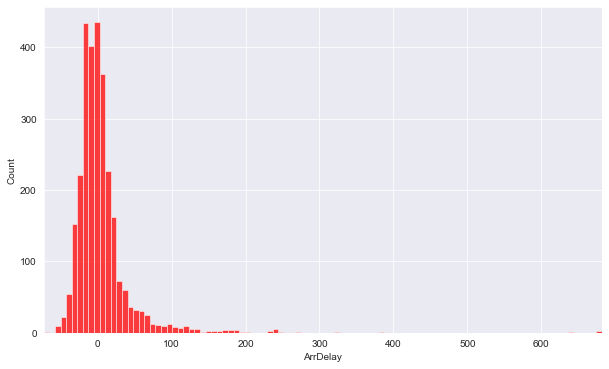

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df["ArrDelay"], bins = 100, color = "red", fill=True, edgecolor="white")
plt.xlim(-73, 682)
plt.show()